In [87]:
%matplotlib inline
import numpy as np
import pandas
from scipy import special
import matplotlib.pyplot as plt

nb = 432
nw = 18
tot = nw + nb

balls = [0]*nb + [1]*nw

nsim=100000

rvs = []
corrs = []
corrs_whites = []
for i in range(nsim):
    r = np.random.choice(balls, size=tot, replace=False)
    incorr = r[:nb].sum() * 2
    corr_whites=r[nb:].sum()
    corr = tot - incorr
    accuracy = corr / tot
    rvs.append(accuracy)
    corrs.append(corr)
    corrs_whites.append(corr_whites)
    
rvS=pandas.Series(rvs)
corrS=pandas.Series(corrs)
corrS_whites=pandas.Series(corrs_whites)

print('acc:', rvS.mean(), '\t\t\tcorrects:', corrS.mean(), '\tcorr whites:', corrS_whites.mean())

acc: 0.923198888889 			corrects: 415.4395 	corr whites: 0.71975


0    0.46983
1    0.37103
2    0.12905
3    0.02608
4    0.00368
dtype: float64


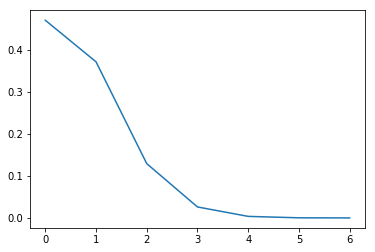

In [81]:
corrS_whites_norm = corrS_whites.value_counts()/nsim
print(corrS_whites_norm.head())
plt.plot(corrS_whites_norm)

0.920000    0.46983
0.924444    0.37103
0.928889    0.12905
0.933333    0.02608
0.937778    0.00368
dtype: float64


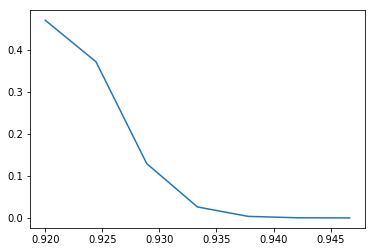

In [82]:
rvs_norm = rvS.value_counts()/nsim
print(rvs_norm.head())
plt.plot(rvs_norm)

414    0.47228
416    0.36962
418    0.12850
420    0.02554
422    0.00381
dtype: float64
415.4395


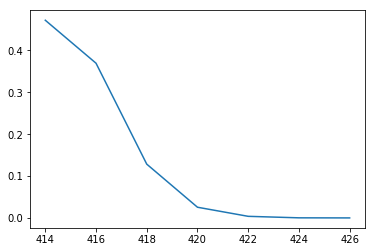

In [97]:
cnorm = corrS.value_counts()/nsim
print(cnorm.head())
print(corrS.mean())
plt.plot(cnorm)

In [84]:
pc=1
for i in range(nw):
    p_c=(nb-i)/(tot-i)
    pc=pc*p_c
    print(i,p_c,pc) 

0 0.96 0.96
1 0.9599109131403119 0.9215144766146993
2 0.9598214285714286 0.884489341393573
3 0.959731543624161 0.8488723209347714
4 0.9596412556053812 0.8146128999104981
5 0.9595505617977528 0.7816622657568151
6 0.9594594594594594 0.7499732549828901
7 0.9593679458239278 0.7195003010558202
8 0.9592760180995475 0.6901993838182529
9 0.9591836734693877 0.6620279803970996
10 0.9590909090909091 0.6349450175626729
11 0.958997722095672 0.6089108254985998
12 0.958904109589041 0.5838870929438628
13 0.9588100686498856 0.5598368236692872
14 0.9587155963302753 0.5367242942517478
15 0.9586206896551724 0.5145150131102962
16 0.9585253456221198 0.49317568076931617
17 0.9584295612009238 0.4726741513147026


in average will take correctly classify this many wbs: 0.72
in average will missclassify: 34.56
average accuracy: 0.9232
variance: 0.6650298440979956 balls.
0 0.92 0.472674151315
1 0.9244444444444444 0.369027530183
2 0.9288888888888889 0.128183841614
3 0.9333333333333333 0.0262310659098
4 0.9377777777777778 0.00352989822351
5 0.9422222222222222 0.000330243461484
6 0.9466666666666667 2.21472797582e-05
7 0.9511111111111111 1.08218808456e-06
8 0.9555555555555556 3.87869544524e-08
9 0.96 1.01883253093e-09
10 0.9644444444444444 1.94635459918e-11
11 0.9688888888888889 2.66452822133e-13
12 0.9733333333333334 2.5540274422e-15
13 0.9777777777777777 1.65636800431e-17
14 0.9822222222222222 6.91074768153e-20
15 0.9866666666666667 1.71829002183e-22
16 0.9911111111111112 2.24776310995e-25
17 0.9955555555555555 1.2271123843e-28
18 1.0 1.5780766259e-32


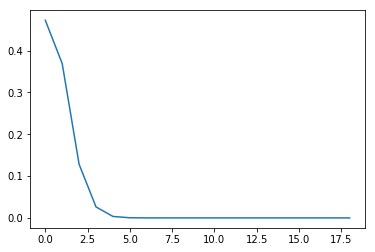

In [118]:
# The hypergeometric distribution is a discrete probability distribution that 
# describes the probability of k successes 
# in  n draws, without replacement, from a finite population of size N that contains exactly K objects
# with that feature. 
K = nw
N = tot
n = nw
k = 0

mean = n*K/N
print ('in average will take correctly classify this many wbs:', mean)
print ('in average will missclassify:', (nw-mean)*2 )
MEAN_ACCURACY = (tot - (nw-mean)*2) /tot
print ('average accuracy:', MEAN_ACCURACY)

variance = n*K*(N-K)*(N-n)/(N*N*(N-1))
print('variance:', variance,'balls.')
# acc_plus_one_sigma= (tot - (nw-(mean+variance)*2)) /tot
# print(acc_plus_one_sigma)
                    
fd=[]
accuracy=[]
for k in range(nw+1):
    hp=special.binom(K,k)*special.binom(N-K,n-k)/special.binom(N,n)
    fd.append(hp)
    acc=(nb-nw+k*2)/tot
    accuracy.append(acc)
    print(k, acc, hp)

plt.plot(fd)


AttributeError: 'list' object has no attribute 'savefig'

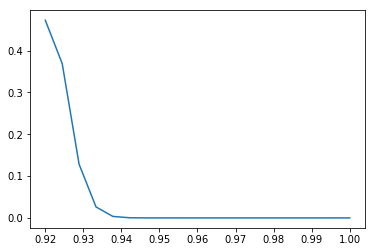

In [120]:
ACC=pandas.Series(fd,index=accuracy)
fig,ax = plt.plot(ACC)
fig.savefig('accuracy distribution.png')